### Objetivo
El objetivo de este proyecto es realizar un análisis de datos sobre una base de datos extraída de internet, con el fin de explorar y comprender los patrones, tendencias y relaciones presentes en los datos. A través de este análisis, se busca no solo obtener insights valiosos que puedan apoyar la toma de decisiones, sino también demostrar y aplicar habilidades en el uso de Python para el análisis de datos. Este proyecto servirá como una muestra de mi capacidad para manipular, visualizar e interpretar datos utilizando herramientas y bibliotecas especializadas como Pandas, Matplotlib y Seaborn, entre otra

Para llevar a cabo este análisis, se utilizaron diversas librerías de Python que facilitan la manipulación, visualización y análisis de datos. A continuación, se importan las librerías necesarias:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Manipulación de datos
la manipulación de datos tiene como objetivo observar, limpiar y eliminar errores en el conjunto de datos para facilitar su lectura

#### Importar datos

In [3]:
df = pd.read_csv("walmart_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Se importó una base de datos obtenida de Kaggle, la cual contiene información detallada sobre las ventas semanales de diversas sucursales de Walmart. Además de las ventas, el dataset incluye variables relevantes como la fecha, la temperatura regional, el precio del combustible, el índice de precios al consumidor (IPC), la tasa de desempleo y un indicador de semanas festivas. Para realizar una primera exploración de los datos, se cargó el conjunto en un DataFrame denominado df y se utilizó el método .shape para identificar su estructura, determinando el número de filas (registros) y columnas (variables) que lo componen.

In [4]:
df.shape

(6435, 8)

Además, para obtener un panorama general de la distribución de los datos, se utilizó el método .describe(). Este comando proporciona un resumen estadístico que incluye las principales medidas de tendencia central, como la desviación estándar,  Este análisis inicial permite identificar rápidamente patrones, posibles valores atípicos y la variabilidad presente en las variables numéricas del dataset.

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#### Correción de valores faltantes
Para garantizar la integridad y calidad de los datos, se realizó una exploración en busca de valores faltantes utilizando el método .isnull(). Este comando permite identificar la presencia de valores nulos en cada columna del dataset, lo cual es crucial para decidir las estrategias de imputación o eliminación de datos incompletos. La detección temprana de estos valores asegura que los análisis posteriores se basen en información completa y confiable.

In [6]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


El análisis de valores faltantes arrojó que no existen valores nulos en ninguna de las columnas del dataset. En caso de haber detectado valores faltantes, se habría procedido a determinar la estrategia más adecuada para su corrección, dependiendo de la naturaleza de la variable y el contexto del dato. Por ejemplo, para variables numéricas, se podría haber optado por la imputación de la media o la mediana, mientras que, para variables categóricas, se habría considerado la imputación de la moda o la eliminación de registros incompletos en caso de ser necesario. Este enfoque asegura que los datos mantengan su integridad y sean adecuados para análisis posteriores.

### Análisis descriptivo
En primer lugar, se determinó la cantidad de tiendas únicas presentes en el dataset. Este paso es fundamental para comprender el alcance del análisis y asegurar que se esté trabajando con una muestra representativa de todas las sucursales de Walmart. Utilizando métodos como .nunique() o .unique(), se identificó el número total de tiendas diferentes, lo que proporciona una base sólida para los análisis posteriores.

In [7]:
num_tiendas = df['Store'].nunique()
print(f'El número total de tiendas es: {num_tiendas}')


El número total de tiendas es: 45


Para determinar qué tienda generó el mayor volumen de ventas, se agruparon los datos por la columna 'Store' utilizando el método .groupby(), y se sumaron las ventas semanales ('Weekly_Sales') con la función .sum(). Esto generó un DataFrame que muestra las ventas totales por tienda. Posteriormente, se ordenaron los resultados de forma descendente utilizando .sort_values(), lo que permitió identificar rápidamente las tiendas con mayores ingresos

In [8]:
#¿Qué tienda tiene el máximo de ventas?
ventas_por_tienda = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

#print(ventas_por_tienda)
ventas_por_tienda_des = ventas_por_tienda.sort_values(by='Weekly_Sales', ascending=False)
print(ventas_por_tienda_des)

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689e+07
2       3  5.758674e+07
37     38  5.515

Una vez ordenadas las tiendas según sus ventas totales de forma descendente, se procedió a seleccionar las 10 tiendas con mayores ventas (top 10) y las 10 tiendas con menores ventas (tail 10). Para ello, se utilizaron los métodos .head(10) y .tail(10), respectivamente. Este análisis permite identificar tanto las tiendas de mejor desempeño como aquellas que podrían requerir atención estratégica para mejorar sus resultados. El código utilizado fue el siguient

In [9]:
# Mostrar las 10 tiendas con mayores ventas
top_10 = (ventas_por_tienda_des.head(10))

# Mostrar las 10 tiendas con menores ventas
tail_10 = ventas_por_tienda_des.tail(10)

print('Las mejores 10 tiendas:\n', top_10, '\n' * 2, 'Las últimas 10 tiendas:\n', tail_10)


Las mejores 10 tiendas:
     Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08 

 Las últimas 10 tiendas:
     Store  Weekly_Sales
28     29   77141554.31
15     16   74252425.40
36     37   74202740.32
29     30   62716885.12
2       3   57586735.07
37     38   55159626.42
35     36   53412214.97
4       5   45475688.90
43     44   43293087.84
32     33   37160221.96


Para representar gráficamente las 10 tiendas con mayores ventas, se utilizó un gráfico de barras creado con la biblioteca Seaborn. Este gráfico permite visualizar de manera clara y efectiva el desempeño de las tiendas líderes en ventas. El código utilizado fue el siguiente:


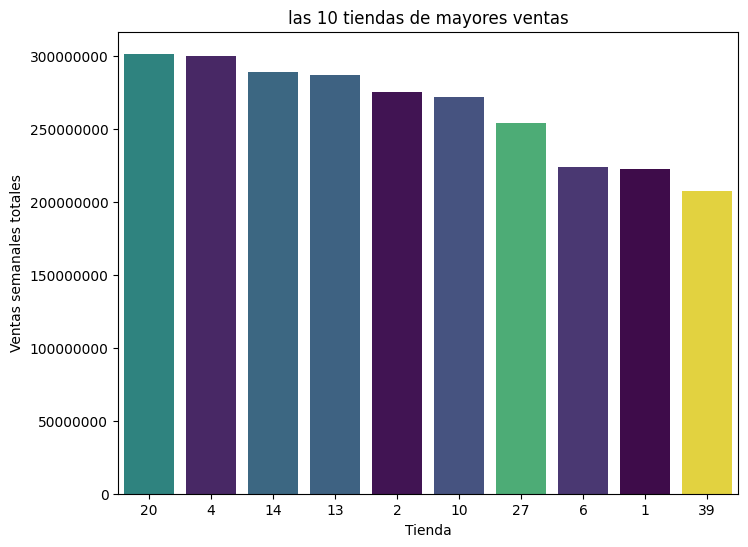

In [11]:
#tamaño
plt.figure(figsize=(8, 6))

#creación
sns.barplot(x='Store', y='Weekly_Sales', data=top_10, hue='Store',palette='viridis',order=top_10['Store'], legend=False)

#personalizar etiquetas
plt.xlabel('Tienda')
plt.ylabel('Ventas semanales totales')
plt.title('las 10 tiendas de mayores ventas')

# se formatea el eje y para evitar notación científica
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

Este gráfico de barras muestra las ventas semanales totales de cada una de las 10 tiendas más exitosas, ordenadas de mayor a menor. La elección de la paleta de colores 'viridis' mejora la claridad visual, mientras que el formato del eje y asegura que los valores se interpreten de manera precisa. Esta visualización es útil para identificar rápidamente las tiendas con mejor desempeño y comparar sus resultados.

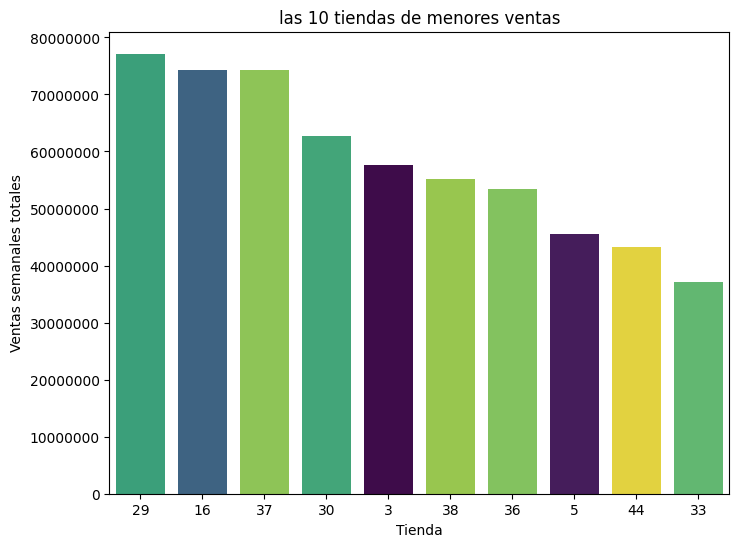

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=tail_10, hue='Store', palette='viridis',order=tail_10['Store'], legend = False)
plt.xlabel('Tienda')
plt.ylabel('Ventas semanales totales')
plt.title('las 10 tiendas de menores ventas')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

#### Análisis de la variabilidad de ventas por tienda
Para evaluar la variabilidad en las ventas semanales de cada tienda, se calculó la desviación estándar de las ventas semanales ('Weekly_Sales') agrupadas por tienda ('Store'). La desviación estándar es una medida de dispersión que indica cuánto varían las ventas semanales respecto a su media. Adicionalmente, se calculó el promedio de las desviaciones estándar para tener una referencia general del nivel de variabilidad en todas las tiendas. El código utilizado fue el siguiente:

In [19]:
# Calcular la desviación estándar de las ventas semanales por tienda
desviacion_estandar_por_tienda = df.groupby('Store')['Weekly_Sales'].std().reset_index()

# Renombrar la columna 
desviacion_estandar_por_tienda.rename(columns={'Weekly_Sales': 'Desviacion_Estandar'}, inplace=True)

# Calcular el promedio de las desviaciones estándar
promedio_desviacion_estandar = desviacion_estandar_por_tienda['Desviacion_Estandar'].mean()

Visualización de la variabilidad
Para representar gráficamente la variabilidad de las ventas por tienda, se creó un gráfico de barras utilizando la biblioteca Seaborn. Este gráfico muestra la desviación estándar de cada tienda, junto con una línea horizontal que indica el promedio general de las desviaciones estándar. El código utilizado fue el siguiente:

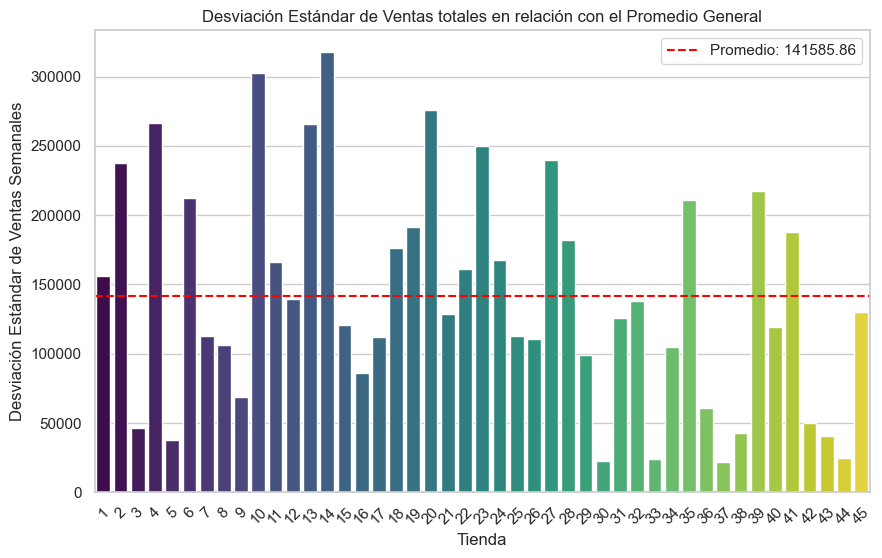

In [21]:
# Estilo del Grafico
sns.set(style="whitegrid")

# Tamaño
plt.figure(figsize=(10, 6))

# Crear Grafico
barplot = sns.barplot(x='Store', y='Desviacion_Estandar', hue='Store', data=desviacion_estandar_por_tienda, palette='viridis', legend=False)

# Añadir la línea horizontal que representa el promedio de las desviaciones estándar
plt.axhline(promedio_desviacion_estandar, color='red', linestyle='--', label=f'Promedio: {promedio_desviacion_estandar:.2f}')

# Etiquetas y título
plt.xlabel('Tienda')
plt.ylabel('Desviación Estándar de Ventas Semanales')
plt.title('Desviación Estándar de Ventas totales en relación con el Promedio General')

# Rotar las etiquetas (legibilidad)
plt.xticks(rotation=45)

# Añadir la leyenda
plt.legend()

plt.show()



Este gráfico permite identificar rápidamente las tiendas con mayor variabilidad en sus ventas semanales (barras más altas) y aquellas con menor variabilidad (barras más bajas). La línea roja punteada representa el promedio general, lo que facilita la comparación entre tiendas. Este análisis es útil para detectar tiendas con ventas inconsistentes, lo que podría indicar la necesidad de investigar factores como promociones, eventos locales o problemas operativos.

#### Cálculo del coeficiente de variación para evaluar la variabilidad relativa
Para analizar la variabilidad relativa de las ventas semanales entre las tiendas, se calculó el coeficiente de variación (CV). Este indicador es especialmente útil porque normaliza la desviación estándar respecto a la media, permitiendo comparar la variabilidad de tiendas con diferentes niveles de ventas.

In [22]:


# Calcular la media y la desviación estándar de las ventas por tienda
estadisticas_por_tienda = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'std']).reset_index()

# Calcular el coeficiente de variación y añadirlo al DataFrame
estadisticas_por_tienda['Coeficiente_Variacion'] = (estadisticas_por_tienda['std'] / estadisticas_por_tienda['mean']) * 100

# Ordenar el DataFrame por el coeficiente de variación en orden descendente
tiendas_ordenadas_cv = estadisticas_por_tienda.sort_values(by='Coeficiente_Variacion', ascending=False,)

#Mostrar las 10 tiendas con mayor C.V.
print('las 10 tiendas con mayor C.V \n', tiendas_ordenadas_cv[['Store', 'Coeficiente_Variacion']].head(10),'\n')

#Mostrar las 10 tiendas con menor C.V.
print('las 10 tiendas con menor C.V. \n',tiendas_ordenadas_cv[['Store', 'Coeficiente_Variacion']].tail(10))


las 10 tiendas con mayor C.V 
     Store  Coeficiente_Variacion
34     35              22.968111
6       7              19.730469
14     15              19.338399
28     29              18.374247
22     23              17.972115
20     21              17.029239
44     45              16.561273
15     16              16.518065
17     18              16.284550
35     36              16.257891 

las 10 tiendas con menor C.V. 
     Store  Coeficiente_Variacion
25     26              11.011066
33     34              10.822524
0       1              10.029212
32     33               9.286835
41     42               9.033533
30     31               9.016105
43     44               8.179331
42     43               6.410363
29     30               5.200804
36     37               4.208412


#### Interpretación del coeficiente de variación
En el análisis de variabilidad de las ventas semanales, se observó que el local 35 presenta un coeficiente de variación (CV) del 23%, lo que lo convierte en la sucursal con mayor variabilidad en sus ventas. Esto indica que las ventas en esta tienda fluctúan significativamente en relación con su media, lo que podría deberse a factores como promociones, eventos locales o cambios en la demanda.
- Posibles acciones 
    - Investigar si las fluctuaciones se deben a factores externos (eventos locales, competencia) o internos (gestión de inventario, promociones).
    - Implementar estrategias para estabilizar las ventas, como mejorar la planificación de inventario o ajustar las promociones

Por otro lado, la sucursal 37 muestra un coeficiente de variación del 4%, siendo la tienda con la menor variabilidad en sus ventas. Esto sugiere que las ventas en esta sucursal son mucho más consistentes y predecibles, lo que podría reflejar una gestión más estable o una base de clientes más fiel.

- Posibles acciones 
    - Replicar las buenas prácticas de esta sucursal en otras tiendas con mayor variabilidad.
    - Asegurarse de que la consistencia no se deba a una falta de crecimiento y, en ese caso, explorar oportunidades para aumentar las ventas

#### Análisis de la matriz de correlación
La matriz de correlación se utilizó para evaluar las relaciones lineales entre las variables del conjunto de datos. Los coeficientes de correlación de Pearson obtenidos indican la fuerza y la dirección de estas relaciones, con valores que oscilan entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta). Un valor cercano a 0 sugiere que no hay una relación lineal significativa.



In [23]:
import pandas as pd

# Calcular la matriz de correlación
correlacion = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

print(correlacion)

              Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI   
Weekly_Sales      1.000000      0.036891    -0.063810    0.009464 -0.072634  \
Holiday_Flag      0.036891      1.000000    -0.155091   -0.078347 -0.002162   
Temperature      -0.063810     -0.155091     1.000000    0.144982  0.176888   
Fuel_Price        0.009464     -0.078347     0.144982    1.000000 -0.170642   
CPI              -0.072634     -0.002162     0.176888   -0.170642  1.000000   
Unemployment     -0.106176      0.010960     0.101158   -0.034684 -0.302020   

              Unemployment  
Weekly_Sales     -0.106176  
Holiday_Flag      0.010960  
Temperature       0.101158  
Fuel_Price       -0.034684  
CPI              -0.302020  
Unemployment      1.000000  


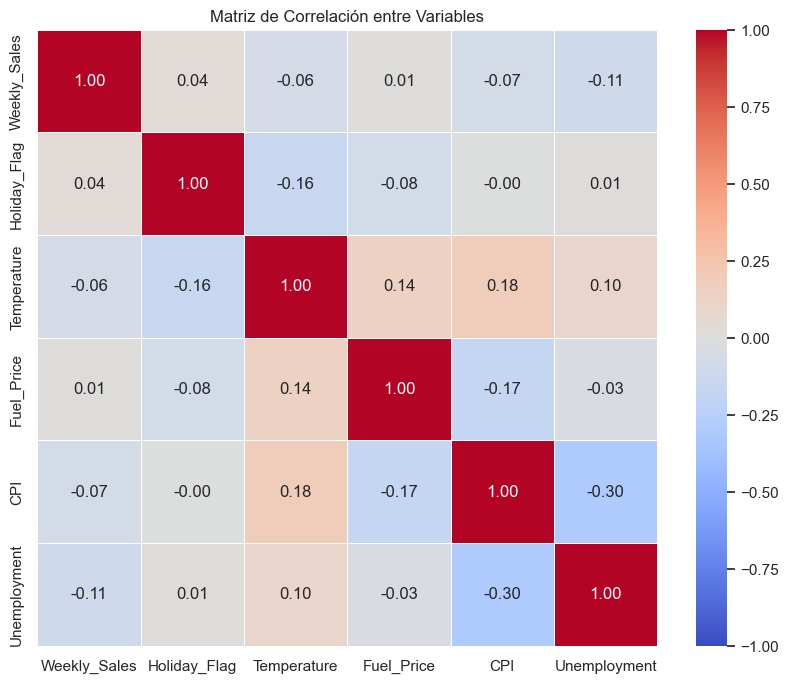

In [25]:
# Configurar el estilo del gráfico para la visualización 
sns.set(style="whitegrid")

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacion, 
    annot=True,  
    fmt=".2f",   
    cmap="coolwarm",  
    vmin=-1, vmax=1,  
    linewidths=0.5    
)

# Añadir título
plt.title('Matriz de Correlación entre Variables')

plt.show()

#### Resultados claves:

- Relaciones débiles:La mayoría de los coeficientes de correlación están cerca de 0, lo que indica que no hay relaciones lineales fuertes entre las variables.

- Implicaciones para el análisis: Dado que no hay relaciones fuertes, es posible que otros factores no incluidos en el modelo (como promociones, eventos locales o competencia) tengan un mayor impacto en las ventas semanales.